<h1>Linear regression with one variable</h1>

Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Entering and formating the Data

In [3]:
# The variable dataset_population_profit contains the dataset for a linear regression problem. 
# The first column is the population of a city and the second column is the prifit of a food truck in that city. 
# A negative value for profit indicates a loss.
# The variable dataset_population_profit contains the dataset for a linear regression problem. 
# The first column is the population of a city and the second column is the prifit of a food truck in that city. 
# A negative value for profit indicates a loss.

dataset_population_profit = np.array([[6.1101,17.592], 
[5.5277,9.1302],
[8.5186,13.662],
[7.0032,11.854],
[5.8598,6.8233],
[8.3829,11.886],
[7.4764,4.3483],
[8.5781,12],
[6.4862,6.5987],
[5.0546,3.8166],
[5.7107,3.2522],
[14.164,15.505],
[5.734,3.1551],
[8.4084,7.2258],
[5.6407,0.71618],
[5.3794,3.5129],
[6.3654,5.3048],
[5.1301,0.56077],
[6.4296,3.6518],
[7.0708,5.3893],
[6.1891,3.1386],
[20.27,21.767],
[5.4901,4.263],
[6.3261,5.1875],
[5.5649,3.0825],
[18.945,22.638],
[12.828,13.501],
[10.957,7.0467],
[13.176,14.692],
[22.203,24.147],
[5.2524,-1.22],
[6.5894,5.9966],
[9.2482,12.134],
[5.8918,1.8495],
[8.2111,6.5426],
[7.9334,4.5623],
[8.0959,4.1164],
[5.6063,3.3928],
[12.836,10.117],
[6.3534,5.4974],
[5.4069,0.55657],
[6.8825,3.9115],
[11.708,5.3854],
[5.7737,2.4406],
[7.8247,6.7318],
[7.0931,1.0463],
[5.0702,5.1337],
[5.8014,1.844],
[11.7,8.0043],
[5.5416,1.0179],
[7.5402,6.7504],
[5.3077,1.8396],
[7.4239,4.2885],
[7.6031,4.9981],
[6.3328,1.4233],
[6.3589,-1.4211],
[6.2742,2.4756],
[5.6397,4.6042],
[9.3102,3.9624],
[9.4536,5.4141],
[8.8254,5.1694],
[5.1793,-0.74279],
[21.279,17.929],
[14.908,12.054],
[18.959,17.054],
[7.2182,4.8852],
[8.2951,5.7442],
[10.236,7.7754],
[5.4994,1.0173],
[20.341,20.992],
[10.136,6.6799],
[7.3345,4.0259],
[6.0062,1.2784],
[7.2259,3.3411],
[5.0269,-2.6807],
[6.5479,0.29678],
[7.5386,3.8845],
[5.0365,5.7014],
[10.274,6.7526],
[5.1077,2.0576],
[5.7292,0.47953],
[5.1884,0.20421],
[6.3557,0.67861],
[9.7687,7.5435],
[6.5159,5.3436],
[8.5172,4.2415],
[9.1802,6.7981],
[6.002,0.92695],
[5.5204,0.152],
[5.0594,2.8214],
[5.7077,1.8451],
[7.6366,4.2959],
[5.8707,7.2029],
[5.3054,1.9869],
[8.2934,0.14454],
[13.394,9.0551],
[5.4369,0.61705]])

dataset_population_profit = np.insert(dataset_population_profit, 0, 1, axis = 1) #Add a column of ones to the dataset
x = dataset_population_profit[0:,0:2]
y = dataset_population_profit[0:,2:3]

Plotting the Data

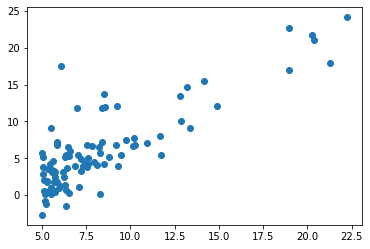

In [4]:
plt.scatter(x[0:,1], y)

Creating the Cost Function and Linear Gradient Discent Function for one variable

In [5]:
def computes_cost_function (x, y, theta):
    m = len(x)

    predicted_y = np.matmul(x, theta)

    cost_function = (1/(2 * m)) * np.sum(np.square(predicted_y - y))

    return cost_function

def computes_linear_gradient_discent (x, y, theta, iterations, alpha):
    m = len(x)
    cost_function = []

    for _ in range(iterations):
        
        predicted_y = np.matmul(x, theta)
        
        theta[0][0] = theta[0][0] - alpha * (1 / m) * np.sum((predicted_y - y))
        theta[1][0] = theta[1][0] - alpha * (1 / m) * x[0:,1:2].T.dot(np.matmul(x, theta) - y) 

        cost_function.append(computes_cost_function(x, y, theta))

    return theta, cost_function

Calculating Theta and plotting the Cost Funtion over the iterations

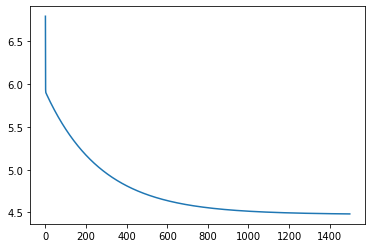

In [19]:
iterations = 1500
alpha = 0.01
theta = np.zeros((2,1))
theta [0][0] = 0
theta, cost_function = computes_linear_gradient_discent(x, y, theta, iterations, alpha)

plt.plot(cost_function)

Plotting our final prediction

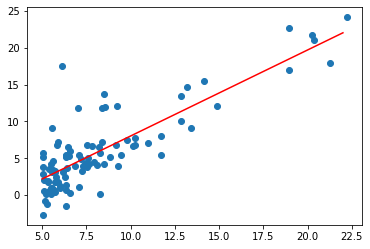

In [20]:
x_final_prediction = []
y_final_prediction = []

min = int(np.min(x[0:,1]))
max = int(np.max(x[0:,1]))

for i in range(min, max+1):
    x_final_prediction.append(i)
    y_final_prediction.append(theta[0][0] + theta[1][0]*i)

plt.scatter(x[0:,1], y)
plt.plot(x_final_prediction,y_final_prediction, 'r')

Plotting the Cost Functions as a surface plot and as a Contour plot 

In [8]:
# initialize J vals to a matrix of 0's
theta0 = np.outer(np.linspace(10, -10, 100), np.ones(100))
theta1 = np.outer(np.linspace(4, -1, 100), np.ones(100)).T # transpose

j_vals = np.zeros((len(theta0), len(theta1)))


# Fill out J vals
for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = [[theta0[i][j]], [theta1[i][j]]];
        j_vals[i][j] = computes_cost_function(x, y, t);


C:\Users\MARCOS~1\AppData\Local\Temp/ipykernel_7236/478689914.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


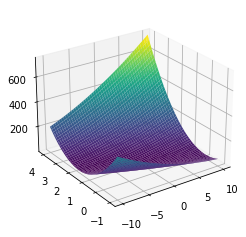

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0, theta1, j_vals, cmap=plt.cm.viridis, linewidth=2)

ax.view_init(25,235)
plt.show()

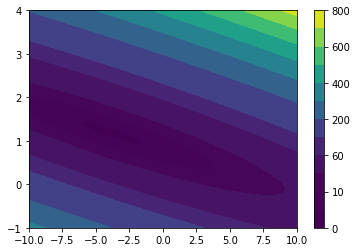

In [10]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(theta0, theta1, j_vals, levels = [0, 5, 10, 20, 60, 100, 200, 300, 400, 500, 600,700,800])
fig.colorbar(cp) # Add a colorbar to a plot
plt.show()